In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [ ]:
# Generate sample time series data
np.random.seed(42)
n_samples = 1000
time_steps = 20

# Create a sinusoidal wave
t = np.linspace(0, 10, n_samples)
sin_wave = np.sin(t)

# Create a dataset with time series sequences
X = [sin_wave[i:i + time_steps] for i in range(n_samples - time_steps)]
y = sin_wave[time_steps:]

X = np.array(X).reshape(-1, time_steps, 1)
y = np.array(y).reshape(-1, 1)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()

# LSTM layer with 50 units and input shape (time_steps, features)
model.add(LSTM(units=150, input_shape=(time_steps, 1)))

# Dense output layer with 1 unit for numeric value prediction
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

7/7 [==============================] - 0s 10ms/step


In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {loss}")


7/7 [==============================] - 0s 12ms/step - loss: 5.5460e-07
Mean Squared Error on Test Set: 5.546014563151402e-07


In [ ]:
import matplotlib.pyplot as plt

# ... (previous code)

# Train the model and get the training history
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# FULL_CODE # 1

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from CSV
csv_file_path = "/content/prepared_2.csv"
df = pd.read_csv(csv_file_path)


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df[['target']])

categorical = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns = categorical)

# Assuming your CSV has a column named 'target' that you want to predict
target_column = 'target'
y = df[target_column].values
df = df.drop(columns=['target'])



# Assuming other columns are features
feature_columns = [col for col in df.columns if col != target_column]
X = df[feature_columns].values

# Normalize/standardize features if needed
# Example: X = (X - X.mean(axis=0)) / X.std(axis=0)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/400
66/66 [==============================] - 4s 13ms/step - loss: 47094.9688 - val_loss: 43582.8945
Epoch 2/400
66/66 [==============================] - 0s 6ms/step - loss: 42067.6094 - val_loss: 39564.8047
Epoch 3/400
66/66 [==============================] - 0s 6ms/step - loss: 38291.6445 - val_loss: 36126.4062
Epoch 4/400
66/66 [==============================] - 0s 6ms/step - loss: 35128.8750 - val_loss: 33127.8125
Epoch 5/400
66/66 [==============================] - 0s 6ms/step - loss: 32310.8691 - val_loss: 30532.1250
Epoch 6/400
66/66 [==============================] - 0s 6ms/step - loss: 29805.9023 - val_loss: 28149.1191
Epoch 7/400
66/66 [==============================] - 0s 6ms/step - loss: 27424.0273 - val_loss: 25840.9941
Epoch 8/400
66/66 [==============================] - 0s 6ms/step - loss: 25242.9316 - val_loss: 23732.3750
Epoch 9/400
66/66 [==============================] - 0s 6ms/step - loss: 23255.5742 - val_loss: 21894.0195
Epoch 10/400
66/66 [================

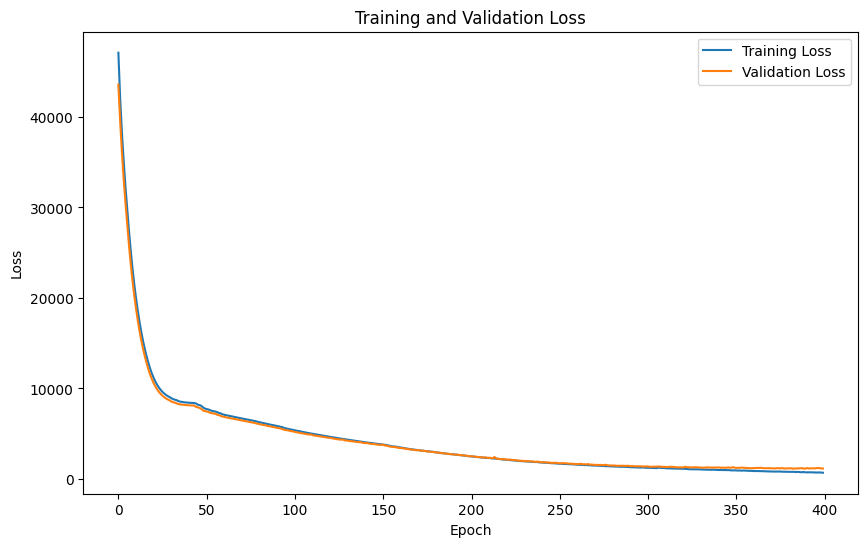

In [ ]:
# Reshape data for LSTM input (assuming you want to use a time series of fixed length)
time_steps = 30  # Adjust based on your preference
n_samples = len(df) - time_steps + 1

X_reshaped = np.array([X[i:i + time_steps] for i in range(n_samples)])
y_reshaped = y[time_steps - 1:]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=150, input_shape=(time_steps, X.shape[1])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {loss}")

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate R-squared
ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - predictions.flatten())**2)
r_squared = 1 - (ss_residual / ss_total)

print(f"R-squared on Test Set: {r_squared}")


16/16 [==============================] - 0s 7ms/step - loss: 6484.8345
Mean Squared Error on Test Set: 6484.83447265625
16/16 [==============================] - 0s 6ms/step
R-squared on Test Set: 0.2625562402457392
